## Lecture 1 Exercise: Introduction to Time Series Analysis

### Objectives:
- Reinforce understanding of the components of time series: trend, seasonality, cyclicity, and noise.
- Practice generating synthetic time series data and visualizing it.
- Learn to handle missing data in time series using various imputation techniques.

### Prerequisites:
- Basic understanding of Python programming.
- Familiarity with `pandas`, `numpy`, and `matplotlib`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Generating and Visualizing Synthetic Time Series Data

 #### 1. **Create a synthetic time series dataset** with the following components:

   - A **non-linear trend**: Use `t = np.arange(0, 156, 1)` to generate a quadratic trend over 3 years with weekly frequency.
   - **Yearly seasonality**: Introduce seasonality with a cycle of 52 weeks (1 year) and an amplitude to represent annual patterns.
   - **Monthly cycle**: Introduce a monthly cycle with a 4-week cycle and an amplitude to represent intra-year variability.
   - **Random noise**: Add normally distributed noise with mean 0 and a varying standard deviation to add more unpredictability.

In [ ]:
## Write your code here ##

#### 2. **Plot the components** of the time series using `matplotlib`.
  
   - Plot each component separately to observe its behavior.

In [ ]:
## Write your code here ##

#### 3. **Create a unified time series** by combining all components (`Trend`, `Yearly_Seasonality`, `Monthly_Cycle`, `Noise`).

   - Add all components together to create a unified series.

In [ ]:
## Write your code here ##

#### 4. **Plot the unified time series** on a separate figure.

In [ ]:
## Write your code here ##

### 2. Handling Missing Data

#### 1. **Introduce missing values** 
- Introduce missing value into the dataset by assigning `NaN` values to proportion of the entries in the unified time series in a non-uniform way. Group the missing values to create more realistic clusters.

In [ ]:
## Write your code here ##

 #### 2.**Visualize the dataset** to observe the impact of missing values


In [ ]:
## Write your code here ##


#### 3. **Impute missing values** using the following methods:
   - **Forward fill**: Replace missing values with the last known value.
   - **Backward fill**: Replace missing values with the next known value.
   - **Spline interpolation**: Estimate missing values using a cubic spline interpolation to provide a smoother estimate.
   - **Linear interpolation**: Estimate missing values using linear interpolation between data points.
   - **Polynomial interpolation**: Estimate missing values using polynomial interpolation of order 2.
   - Both ‘polynomial’ and ‘spline’ require that you also specify an order (int)

   - **You can Explore Additional interpolation methods**: ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’

In [ ]:
## Write your code here ##

#### 4. **Plot the imputed datasets** and compare the effectiveness of each method.

## Exercise 1 - Solution Example

### 1. Generating and Visualizing Synthetic Time Series Data

 #### 1. **Create a synthetic time series dataset**

In [26]:
# Time index array (156 weeks)
t = np.arange(0, 156, 1)
df = pd.DataFrame(index=t)

# Set the index as a datetime object with weekly frequency
df.index = pd.date_range(start='2024-01-01', periods=len(t), freq='W')

# Non-linear trend component (quadratic)
df['Trend'] = 0.02 * (t ** 2) - t * 0.3

# Yearly seasonal component with a 52-week cycle and amplitude of 40
df['Yearly_Seasonality'] = 40 * np.sin(2 * np.pi * t / 52)

# Monthly cycle with a 4-week cycle and  amplitude changing randomly between 10 and 20
amplitude = np.random.uniform(10, 50, size=t.size)# creat a vector of random numbers between 10 and 50 the same size as t
df['Monthly_Cycle'] = amplitude * np.sin(2 * np.pi * t / 4)

# Noise component with varying standard deviation
df['Noise'] = np.random.normal(0, np.random.uniform(0.5, 3), size=t.size)

df.head()

,Trend,Yearly_Seasonality,Monthly_Cycle,Noise
2024-01-07,0.00,0.000000,0.000000e+00,-0.849527
2024-01-14,-0.28,4.821467,4.643895e+01,-0.089715
2024-01-21,-0.52,9.572627,2.566955e-15,0.794404
2024-01-28,-0.72,14.184195,-3.053737e+01,-1.167136
2024-02-04,-0.88,18.588927,-4.359926e-15,0.220956


#### 2. Plot each component separately to observe its behavior

##### All on the same figure

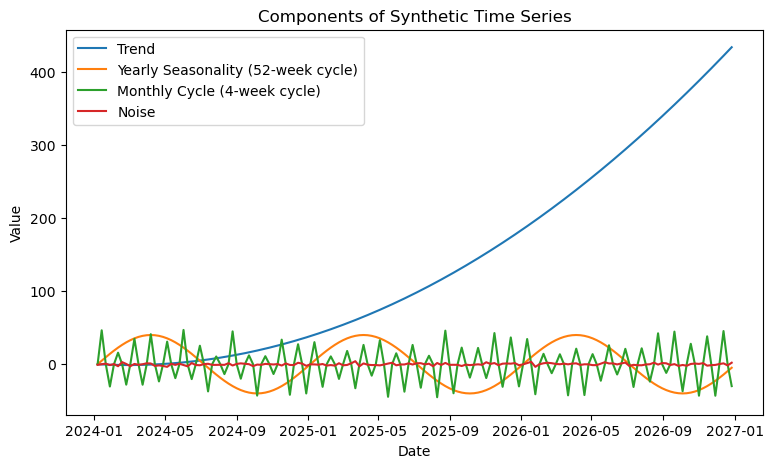

In [27]:
plt.figure(figsize=(9, 5))
plt.plot(df.index, df['Trend'], label='Trend')
plt.plot(df.index, df['Yearly_Seasonality'], label='Yearly Seasonality (52-week cycle)')
plt.plot(df.index, df['Monthly_Cycle'], label='Monthly Cycle (4-week cycle)')
plt.plot(df.index, df['Noise'], label='Noise')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Components of Synthetic Time Series')
plt.show()

##### subplot option

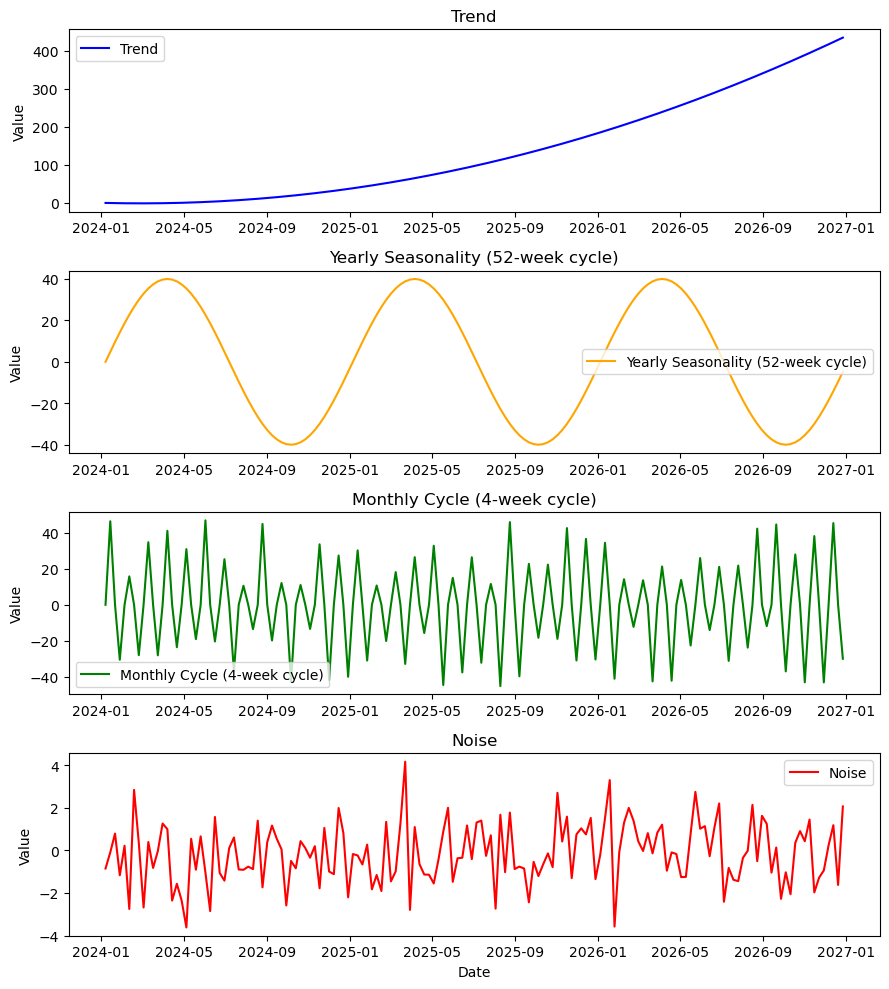

In [28]:
fig, axs = plt.subplots(4, 1, figsize=(9, 10))  # 4 rows, 1 column

# Plot Trend
axs[0].plot(df.index, df['Trend'], label='Trend', color='blue')
axs[0].set_title('Trend')
axs[0].set_ylabel('Value')
axs[0].legend()

# Plot Yearly Seasonality
axs[1].plot(df.index, df['Yearly_Seasonality'], label='Yearly Seasonality (52-week cycle)', color='orange')
axs[1].set_title('Yearly Seasonality (52-week cycle)')
axs[1].set_ylabel('Value')
axs[1].legend()

# Plot Monthly Cycle
axs[2].plot(df.index, df['Monthly_Cycle'], label='Monthly Cycle (4-week cycle)', color='green')
axs[2].set_title('Monthly Cycle (4-week cycle)')
axs[2].set_ylabel('Value')
axs[2].legend()

# Plot Noise
axs[3].plot(df.index, df['Noise'], label='Noise', color='red')
axs[3].set_title('Noise')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Value')
axs[3].legend()

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

#### 3. **Create a unified time series** by combining all components

In [29]:
df['Unified_Time_Series'] = df['Trend'] + df['Yearly_Seasonality'] + df['Monthly_Cycle'] + df['Noise']

#### 4. **Plot the unified time series** on a separate figure.

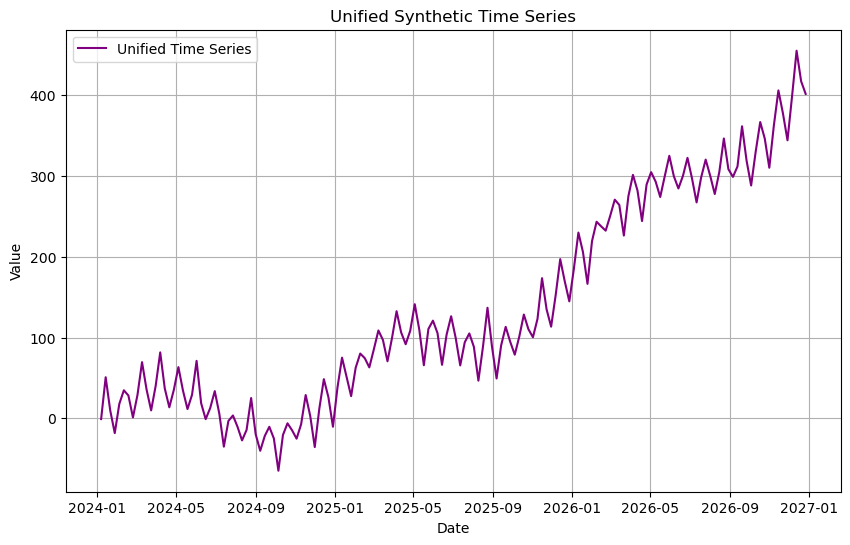

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Unified_Time_Series'], label='Unified Time Series', color='purple')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Unified Synthetic Time Series')
plt.legend()
plt.grid(True)
plt.show()

### 2. Handling Missing Data

#### 1. **Introduce missing values** 

In [31]:
np.random.seed(42)  # For reproducibility

# The number of missing data clusters to introduce
num_missing_clusters = 10

max_cluster_size = 0.04 # Maximum cluster size as a proportion of the total data

# Create new dataframe to store missing values
df_missing_values = pd.DataFrame({'Unified_Time_Series': df['Unified_Time_Series']}.copy(), index=df.index)

for i in range(num_missing_clusters):
    cluster_size = np.random.randint(1, int(max_cluster_size * len(df))) # decide cluster size

    start_idx = np.random.randint(0, len(df) - cluster_size) # locate the start index of the cluster
    # create cluster indices
    cluster_indices = df.index[start_idx:start_idx + cluster_size]

    # place nan values in the cluster indices in the new dataframe
    df_missing_values.loc[cluster_indices, 'Unified_Time_Series'] = np.nan

print("Dataframe after introducing missing values:")
print(df_missing_values.info())
# print number of missing values
print("\nNumber of missing values:", df_missing_values['Unified_Time_Series'].isnull().sum())

Dataframe after introducing missing values:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2024-01-07 to 2026-12-27
Freq: W-SUN
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unified_Time_Series  122 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB
None

Number of missing values: 34


 #### 2.**Visualize the dataset** to observe the impact of missing values

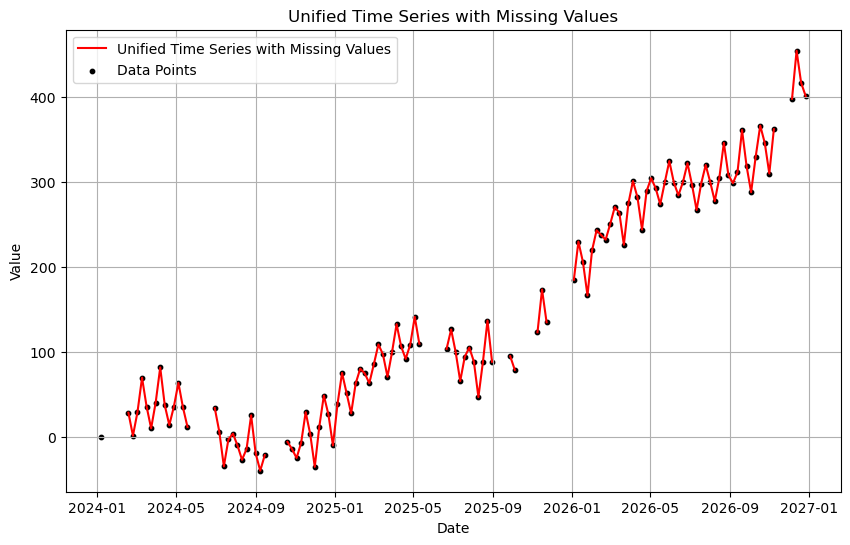

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df_missing_values.index, df_missing_values['Unified_Time_Series'], label='Unified Time Series with Missing Values', color='red')
plt.scatter(df_missing_values.index, df_missing_values['Unified_Time_Series'], color='black', s=10, label='Data Points')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Unified Time Series with Missing Values')
plt.legend()
plt.grid(True)
plt.show()

#### 3. **Impute missing values**

In [33]:
# Forward fill
df_missing_values['Forward_Fill'] = df_missing_values['Unified_Time_Series'].fillna(method='ffill')

# Backward fill
df_missing_values['Backward_Fill'] = df_missing_values['Unified_Time_Series'].fillna(method='bfill')

# Spline interpolation
df_missing_values['Spline_Interpolation'] = df_missing_values['Unified_Time_Series'].interpolate(method='spline', order=3)

# Linear interpolation
df_missing_values['Linear_Interpolation'] = df_missing_values['Unified_Time_Series'].interpolate(method='linear')

# Polynomial interpolation of order 2
df_missing_values['Polynomial_Interpolation'] = df_missing_values['Unified_Time_Series'].interpolate(method='polynomial', order=2)

df_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2024-01-07 to 2026-12-27
Freq: W-SUN
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unified_Time_Series       122 non-null    float64
 1   Forward_Fill              156 non-null    float64
 2   Backward_Fill             156 non-null    float64
 3   Spline_Interpolation      156 non-null    float64
 4   Linear_Interpolation      156 non-null    float64
 5   Polynomial_Interpolation  156 non-null    float64
dtypes: float64(6)
memory usage: 12.6 KB


#### 4. **Plot the imputed datasets** 

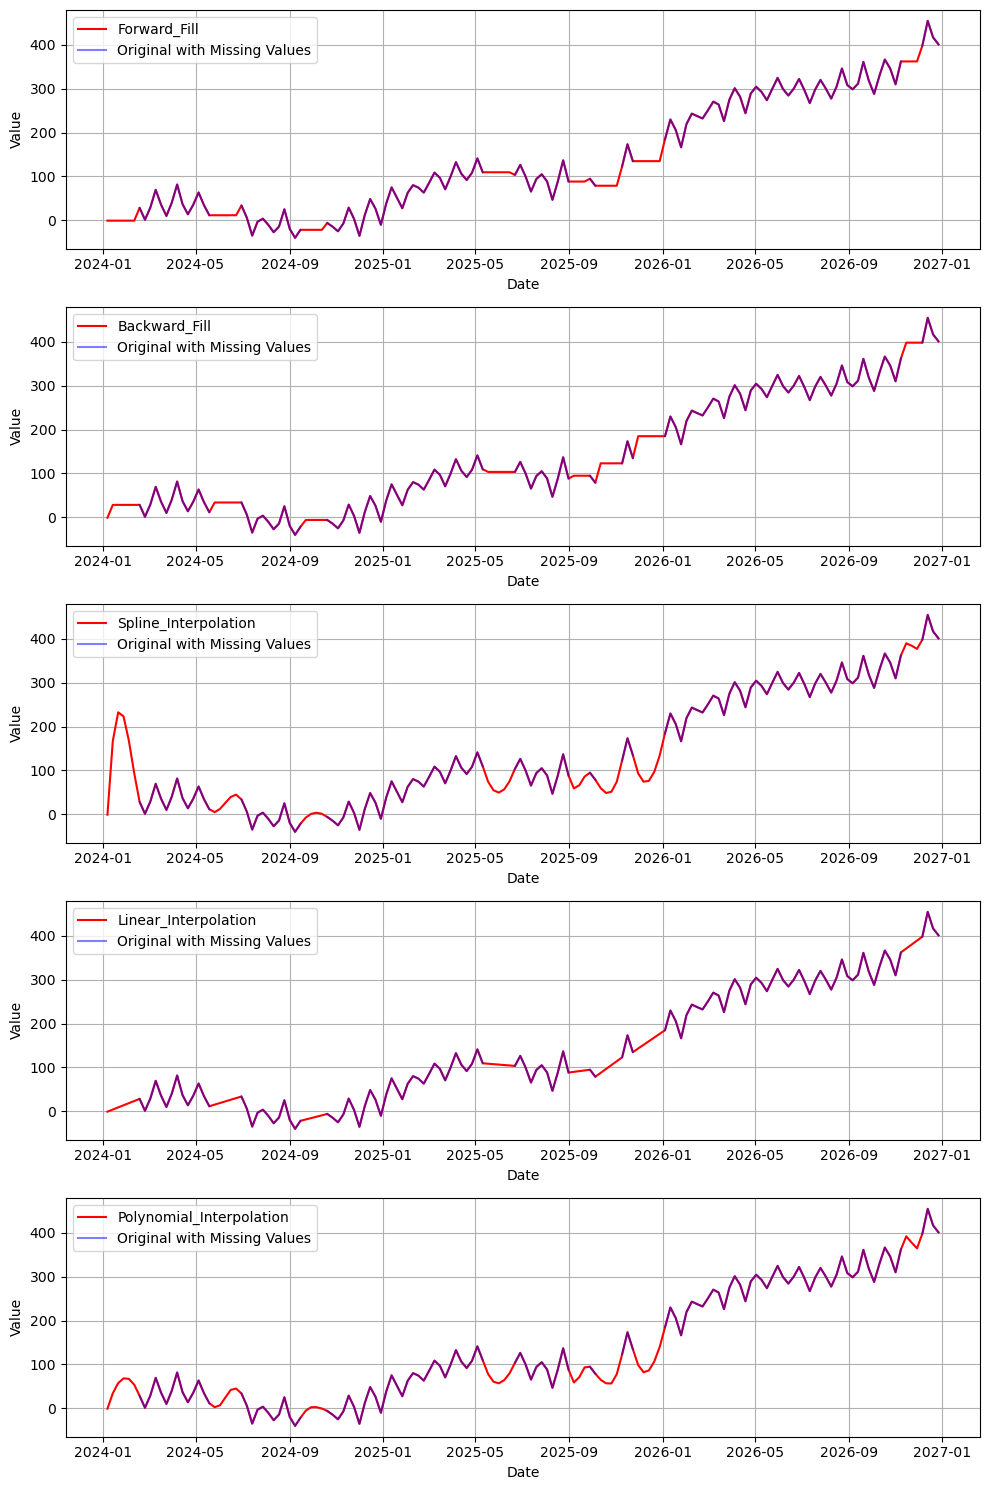

In [34]:

imputation_methods = df_missing_values.columns[1:]
# set the suplots properties by the number of imputation methods
fig, axs = plt.subplots(len(imputation_methods), 1, figsize=(10, 3 * len(imputation_methods)) )

for i, method in enumerate(imputation_methods):
    
    axs[i].plot(df_missing_values.index, df_missing_values[method], label=method, color='red')
    axs[i].plot(df_missing_values.index, df_missing_values['Unified_Time_Series'], label='Original with Missing Values', color='blue', alpha=0.5)
    
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Value')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()